General Libraries Needed

In [1]:
import xarray as xr
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import matplotlib.dates as mdates
import datetime
import glob
import urllib.request


Summary Statistics for The first and last decade in the dataset

In [24]:


# Open the netCDF file using xarray
ds = xr.open_dataset("file2.nc")

# Select the precipitation variable and the time dimension
pre = ds["pre"]
time = ds["time"]

# Calculate the summary statistics for the first 10 years
pre_first_10_years = pre.sel(time=slice(time[0], time[119]))
mean_first_10_years = pre_first_10_years.mean()
min_first_10_years = pre_first_10_years.min()
max_first_10_years = pre_first_10_years.max()

# Calculate the summary statistics for the last 10 years
pre_last_10_years = pre.sel(time=slice(time[-120], time[-1]))
mean_last_10_years = pre_last_10_years.mean()
min_last_10_years = pre_last_10_years.min()
max_last_10_years = pre_last_10_years.max()


from prettytable import PrettyTable

# Create a table with three columns: "Variable", "First 10 Years", "Last 10 Years"
table = PrettyTable(["Variable", "First 10 Years", "Last 10 Years"])
mean_first_10_years = mean_first_10_years.values
min_first_10_years = min_first_10_years.values
max_first_10_years = max_first_10_years.values
mean_last_10_years = mean_last_10_years.values
min_last_10_years = min_last_10_years.values
max_last_10_years = max_last_10_years.values
# Add a row for each summary statistic
table.add_row(["Mean", mean_first_10_years, mean_last_10_years])
table.add_row(["Minimum", min_first_10_years, min_last_10_years])
table.add_row(["Maximum", max_first_10_years, max_last_10_years])

# Print the table
print(table)


+----------+----------------+---------------+
| Variable | First 10 Years | Last 10 Years |
+----------+----------------+---------------+
|   Mean   |    3.744913    |   3.0588973   |
| Minimum  |      0.0       |      0.0      |
| Maximum  |   345.80002    |     229.2     |
+----------+----------------+---------------+


Time-Series Plot for the dataset and trendline 

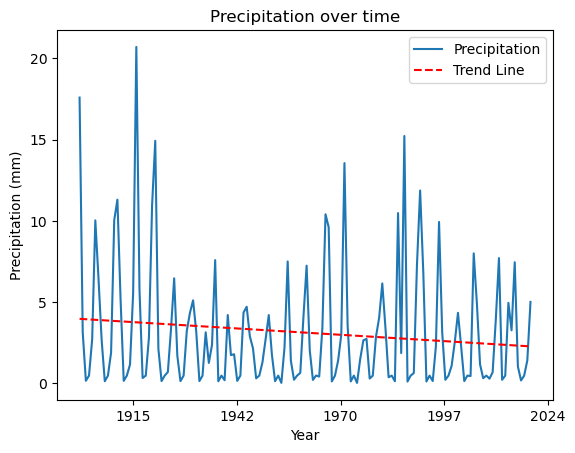

In [52]:

# open the netCDF file
ds = xr.open_dataset('file2.nc')

# select the variable of interest and calculate the mean over the whole area
data = ds['pre'].sel(lat=slice(-90, 90), lon=slice(-180, 180)).mean(dim=['lat', 'lon'])

# subsample the data by taking only every 10th year
data = data.isel(time=range(0, len(data['time']), 10))

# Convert the datetime objects to floating point values
time_values = mdates.date2num(data['time'])

# Filter out datetime objects that are outside the valid range
valid_time = data['time'].where(time_values >= mdates.date2num(datetime.datetime(1, 1, 1))).where(time_values <= mdates.date2num(datetime.datetime(9999, 1, 1)))
valid_data = data.where(time_values >= mdates.date2num(datetime.datetime(1, 1, 1))).where(time_values <= mdates.date2num(datetime.datetime(9999, 1, 1)))


# Convert valid_time to a numpy array of floating point values
valid_time_values = mdates.date2num(valid_time)

# Fit a linear trend line to the data
trend_coefficients = np.polyfit(valid_time_values, valid_data, 1)
trend_line = np.poly1d(trend_coefficients)

# Convert valid_time to a numpy array of floating point values
valid_time_values = mdates.date2num(valid_time)

# plot the data and the trend line
plt.plot(valid_time_values, valid_data)
plt.plot(valid_time_values, trend_line(valid_time_values), 'r--')
# Set the x axis tick labels to show the years
years_fmt = mdates.DateFormatter('%Y')
plt.gca().xaxis.set_major_formatter(years_fmt)


# add a title, axis labels, and a legend
plt.title('Precipitation over time')
plt.xlabel('Year')
plt.ylabel('Precipitation (mm/month)')
plt.legend(['Precipitation', 'Trend Line'])

plt.show()



Plotting the sum of the total preciptation for the first 10 years and last 10 years

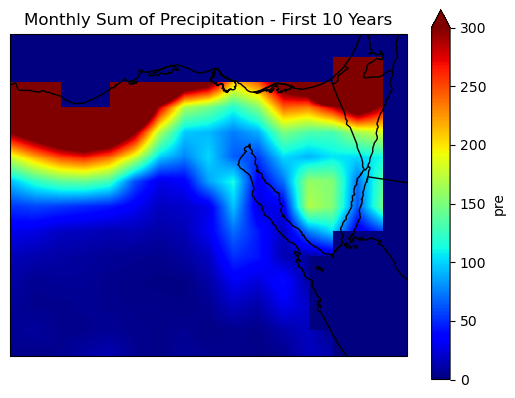

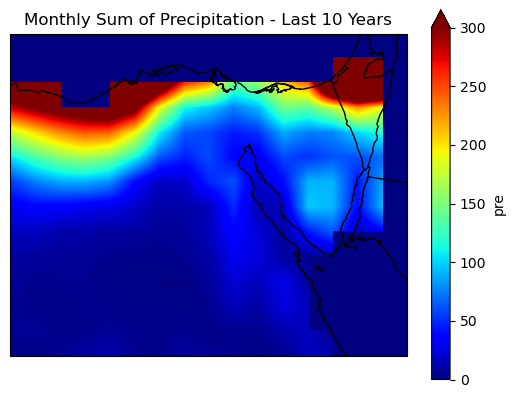

In [22]:
# Import necessary libraries
import xarray as xr
import matplotlib.pyplot as plt
import cartopy.feature as cfeature
import cartopy.crs as ccrs

# Open the NetCDF file using xarray
ds = xr.open_dataset('file2.nc')

# Extract the precipitation and time data
precip = ds['pre']
time = ds["time"]


# Extract the first 10 years of data
precip_first_10 = precip.sel(time=slice(time[0], time[119]))
# Extract the last 10 years of data
precip_last_10 = precip.sel(time=slice(time[-120], time[-1]))

# Group the data by month and sum over the other dimensions
precip_mon_first_10 = precip_first_10.groupby('time.month').sum()
precip_mon_last_10 = precip_last_10.groupby('time.month').sum()


# Plot the first 10 years of data

ax = plt.axes(projection=ccrs.PlateCarree())
precip_mon_first_10[0,:,:].plot(cmap='jet', vmax=300, ax=ax)
ax.add_feature(cfeature.COASTLINE)
ax.add_feature(cfeature.OCEAN)
ax.add_feature(cfeature.BORDERS)
plt.title('Monthly Sum of Precipitation - First 10 Years')
plt.show()

# Plot the last 10 years of data

ax = plt.axes(projection=ccrs.PlateCarree())
precip_mon_last_10[0,:,:].plot(cmap='jet', vmax=300, ax=ax)
ax.add_feature(cfeature.COASTLINE)
ax.add_feature(cfeature.OCEAN)
ax.add_feature(cfeature.BORDERS)
plt.title('Monthly Sum of Precipitation - Last 10 Years')
plt.show()


Plotting the difference between the two above plots

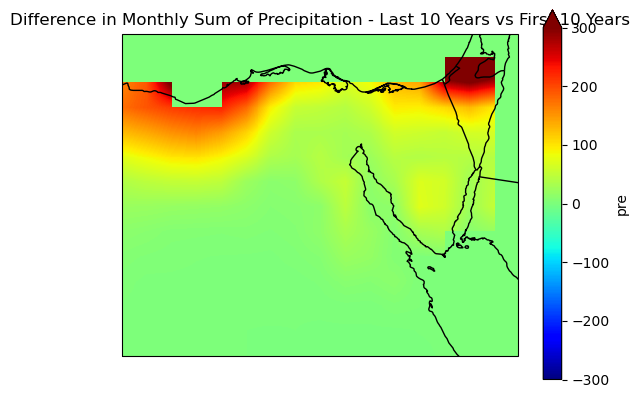

In [24]:
# Import necessary libraries
import xarray as xr
import matplotlib.pyplot as plt
import cartopy.feature as cfeature
import cartopy.crs as ccrs

# Open the NetCDF file using xarray
ds = xr.open_dataset('file2.nc')

# Extract the precipitation and time data
precip = ds['pre']
time = ds["time"]


# Extract the first 10 years of data
precip_first_10 = precip.sel(time=slice(time[0], time[119]))
# Extract the last 10 years of data
precip_last_10 = precip.sel(time=slice(time[-120], time[-1]))

# Group the data by month and sum over the other dimensions
precip_mon_first_10 = precip_first_10.groupby('time.month').sum()
precip_mon_last_10 = precip_last_10.groupby('time.month').sum()

# Calculate the difference between the two data sets
precip_diff = precip_mon_first_10 - precip_mon_last_10

# Plot the difference

ax = plt.axes(projection=ccrs.PlateCarree())
precip_diff[0,:,:].plot(cmap='jet', vmax=300, ax=ax)
ax.add_feature(cfeature.COASTLINE)
ax.add_feature(cfeature.OCEAN)
ax.add_feature(cfeature.BORDERS)
plt.title('Difference in Monthly Sum of Precipitation - Last 10 Years vs First 10 Years')
plt.show()


Annual Cummulative Precipation across the first decade in the datatset

Text(0.5, 1.0, 'Annual cumulative precipitation for first 20 years (1901-1920)')

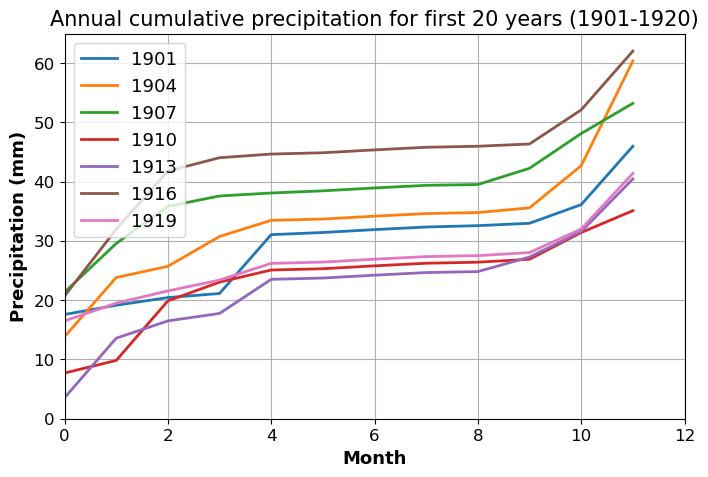

In [35]:
import xarray as xr
import matplotlib.pyplot as plt

# Open the netCDF file
ds = xr.open_dataset('file2.nc')

# Select the average precipitation over all longitudes and latitudes
da_avg_precip = ds['pre'].mean(dim=['lon', 'lat'])

# Initialize the figure
fig = plt.figure(figsize=[8,5], facecolor='w')

# Loop over the years from 1901 to 1905
for yr in range(1901, 1920,3):
    # Select the data for the current year
    da_yr = da_avg_precip.sel(time=slice(f"{yr}-01-01", f"{yr+1}-01-01"))
    
    # Calculate the cumulative sum of the precipitation over the year
    dataplot = da_yr.cumsum()
    
    # Plot the cumulative sum
    plt.plot(dataplot, linewidth=2, label = yr)
    
    
# Add a legend, grid, and labels
plt.legend(fontsize=13)
plt.grid()
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.ylabel('Precipitation (mm)', fontsize = 13, fontweight = 'bold')
plt.xlabel('Month', fontsize = 13, fontweight = 'bold')
plt.xlim([0,12])
plt.ylim(bottom=0)
plt.title('Annual cumulative precipitation for first 20 years (1901-1920)', fontsize=15)



Annual Cummulative Precipation across the first decade in the datatset

Text(0.5, 1.0, 'Annual cumulative precipitation for last 20 years (2000-2020)')

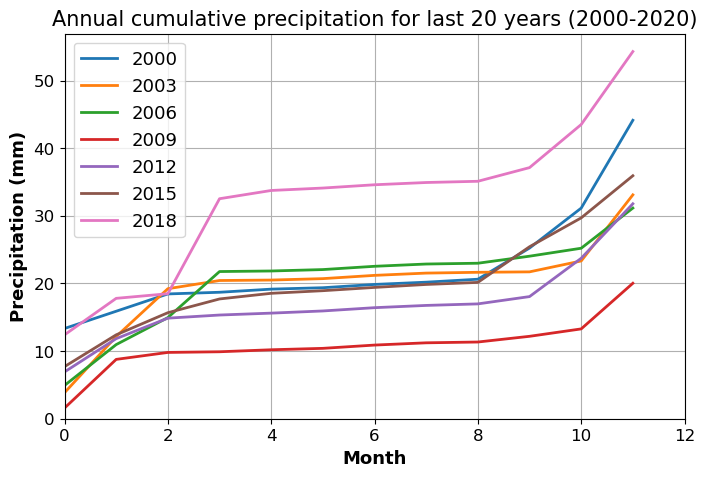

In [36]:
import xarray as xr
import matplotlib.pyplot as plt

# Open the netCDF file
ds = xr.open_dataset('file2.nc')

# Select the average precipitation over all longitudes and latitudes
da_avg_precip = ds['pre'].mean(dim=['lon', 'lat'])

# Initialize the figure
fig = plt.figure(figsize=[8,5], facecolor='w')

# Loop over the years from 1901 to 1905
for yr in range(2000, 2020,3):
    # Select the data for the current year
    da_yr = da_avg_precip.sel(time=slice(f"{yr}-01-01", f"{yr+1}-01-01"))
    
    # Calculate the cumulative sum of the precipitation over the year
    dataplot = da_yr.cumsum()
    
    # Plot the cumulative sum
    plt.plot(dataplot, linewidth=2, label = yr)
    
    
# Add a legend, grid, and labels
plt.legend(fontsize=13)
plt.grid()
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.ylabel('Precipitation (mm)', fontsize = 13, fontweight = 'bold')
plt.xlabel('Month', fontsize = 13, fontweight = 'bold')
plt.xlim([0,12])
plt.ylim(bottom=0)
plt.title('Annual cumulative precipitation for last 20 years (2000-2020)', fontsize=15)



In [3]:
import xarray as xr
import statsmodels.api as sm
precipitation_ds = xr.open_dataset('file2.nc')


Latitude centroid: 28.99
Longitude centroid: 31.74


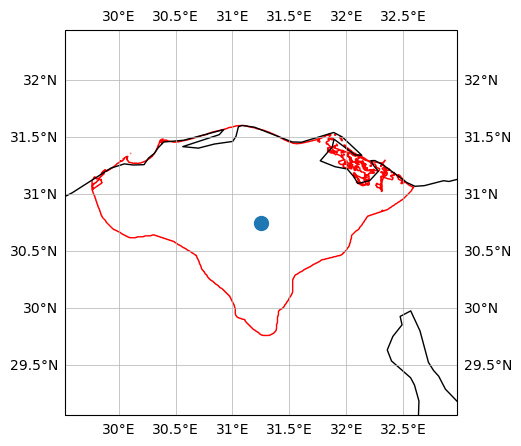

In [16]:
import numpy as np
import netCDF4
import cartopy.feature as cfeature

# Open the netCDF file and read the latitude and longitude variables
nc = netCDF4.Dataset('file2.nc')
lat = nc.variables['lat'][:]
lon = nc.variables['lon'][:]

# Calculate the mean of the latitude and longitude values
lat_centroid = np.mean(lat)
lon_centroid = np.mean(lon)

# Print the centroid coordinates
print('Latitude centroid:', lat_centroid)
print('Longitude centroid:', lon_centroid)
import matplotlib.pyplot as plt
import cartopy.crs as ccrs

# Create a new figure and axes, using the PlateCarree projection
fig = plt.figure(figsize=(10, 5))
ax = plt.axes(projection=ccrs.PlateCarree())
import cartopy.io.shapereader as shpreader

# Read the shapefile using the shapereader
reader = shpreader.Reader('Nile.shp')
shapes = list(reader.geometries())

# Plot the shapes on the map
ax.add_geometries(shapes, ccrs.PlateCarree(), facecolor='none', edgecolor='red')



# Add the coastlines and country boundaries to the map
ax.coastlines(resolution='50m')
ax.add_feature(cfeature.BORDERS)

# Plot the centroid marker on the map
ax.scatter(31.25, 30.75, transform=ccrs.PlateCarree(), s=100)

# Add gridlines and a colorbar
ax.gridlines(draw_labels=True, linewidth=0.5)

plt.show()


Timeseries analysis of the decomposed seasonlity on the centroid only

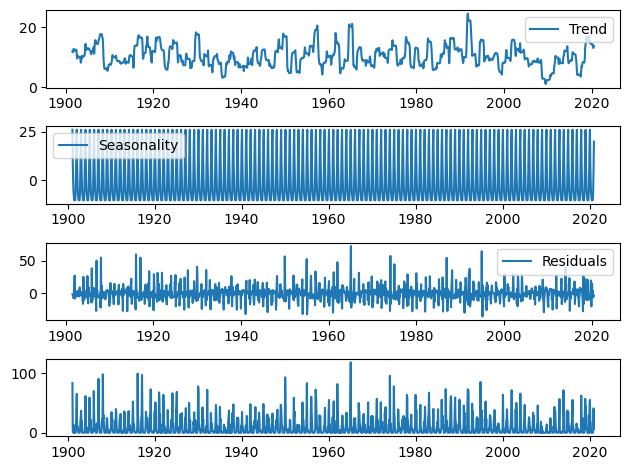

In [46]:
    import xarray as xr
    import pandas as pd
    import statsmodels.api as sm
    from netCDF4 import num2date

    # Open the netCDF file and select the data of interest
    precipitation_ds = xr.open_dataset('file2.nc')
    lat_of_interest = 31.25
    lon_of_interest = 30.75
    precipitation_ts = precipitation_ds.sel(lat=lat_of_interest,lon=lon_of_interest)['pre']

    # Seasonal decompose the time series
    decomposition = sm.tsa.seasonal_decompose(precipitation_ts.to_dataframe().pre.resample('M').mean())

    # Plot the decomposition
    import matplotlib.pyplot as plt
    plt.figure()
    plt.subplot(411)
    plt.plot(decomposition.trend, label='Trend')
    plt.legend(loc='best')
    plt.subplot(412)
    plt.plot(decomposition.seasonal,label='Seasonality')
    plt.legend(loc='best')
    plt.subplot(413)
    plt.plot(decomposition.resid, label='Residuals')
    plt.legend(loc='best')
    plt.subplot(414)
    plt.plot(decomposition.observed, label='Observed')
    plt.tight_layout()



    # The seasonal_decompose() function in the statsmodels library is used to decompose a time series 
# into its trend, seasonal, and residual components.
# The decomposition is performed using a technique called the moving average method, which works by fitting 
# a set of weights to the data that minimize the sum of the squared differences between the observed data 
# and the corresponding moving averages.
#
# The trend component represents the long-term increase or decrease in the data over time, and is 
# usually represented as a line. It shows the underlying pattern in the data, after removing the 
# short-term fluctuations.
#
# The seasonal component represents the repetitive pattern of the data that occurs at a regular time 
# interval, such as daily, weekly, or monthly. It shows the repeating pattern of the data, after 
# removing the underlying trend.
#
# The residual component represents the short-term fluctuations in the data that are not explained by 
# the trend or seasonal components. These fluctuations are usually considered as noise or errors in the data, 
# and are usually assumed to be random.
#
# The observed component is the original time series, before decomposition.
#
# The seasonal_decompose() function returns an object that contains the trend, seasonal, and residual 
# components, along with the observed time series data.



Timeseries analysis of the decomposed seasonlity across the whole region (average)

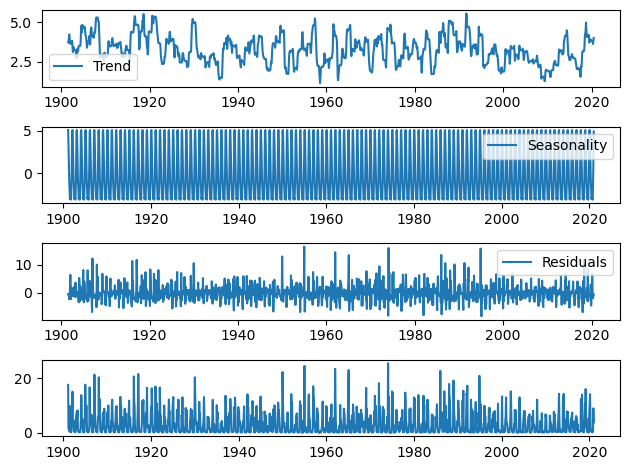

In [47]:
    import xarray as xr
    import pandas as pd
    import statsmodels.api as sm
    from netCDF4 import num2date

    # Open the netCDF file and select the data of interest
    precipitation_ds = xr.open_dataset('file2.nc')
    precipitation_ts = precipitation_ds['pre'].mean(dim=('lat','lon'))

    # Seasonal decompose the time series
    decomposition = sm.tsa.seasonal_decompose(precipitation_ts.to_dataframe().pre.resample('M').mean())

    # Plot the decomposition
    import matplotlib.pyplot as plt
    plt.figure()
    plt.subplot(411)
    plt.plot(decomposition.trend, label='Trend')
    plt.legend(loc='best')
    plt.subplot(412)
    plt.plot(decomposition.seasonal,label='Seasonality')
    plt.legend(loc='best')
    plt.subplot(413)
    plt.plot(decomposition.resid, label='Residuals')
    plt.legend(loc='best')
    plt.subplot(414)
    plt.plot(decomposition.observed, label='Observed')
    plt.tight_layout()



    # The seasonal_decompose() function in the statsmodels library is used to decompose a time series 
# into its trend, seasonal, and residual components.
# The decomposition is performed using a technique called the moving average method, which works by fitting 
# a set of weights to the data that minimize the sum of the squared differences between the observed data 
# and the corresponding moving averages.
#
# The trend component represents the long-term increase or decrease in the data over time, and is 
# usually represented as a line. It shows the underlying pattern in the data, after removing the 
# short-term fluctuations.
#
# The seasonal component represents the repetitive pattern of the data that occurs at a regular time 
# interval, such as daily, weekly, or monthly. It shows the repeating pattern of the data, after 
# removing the underlying trend.
#
# The residual component represents the short-term fluctuations in the data that are not explained by 
# the trend or seasonal components. These fluctuations are usually considered as noise or errors in the data, 
# and are usually assumed to be random.
#
# The observed component is the original time series, before decomposition.
#
# The seasonal_decompose() function returns an object that contains the trend, seasonal, and residual 
# components, along with the observed time series data.



Exporting Time Data from the average of all values to an Excel to be processed by R language later. 

In [2]:
import xarray as xr
import pandas as pd

# Open the netCDF file
ds = xr.open_dataset('file2.nc')

# Extract the 'pre' variable and calculate the mean
mean_pre = ds['pre'].mean(dim=('lat','lon'))

# Extract the date information from the netCDF file
dates = ds['time'].to_pandas()

# Convert the point data to a pandas DataFrame
df = mean_pre.to_dataframe()

# Add the date information to the dataframe
df['Date'] = dates

# Write the DataFrame to an Excel file
df.to_excel('point_data.xlsx', index=False)


In [2]:
import plotly.express as px
import plotly.graph_objs as go
import pandas as pd
import xarray as xr

# Open the NetCDF dataset
ds = xr.open_dataset("file2.nc")

# Select the relevant variables
df = ds[['lat', 'lon', 'pre', 'time']].to_dataframe()

# Compute the time-average of 'pre' for each (lat, lon)
df_mean = df.groupby(['lat', 'lon']).mean()
df_mean.reset_index(inplace=True)

# Create the map
fig = px.scatter_mapbox(df_mean, lat="lat", lon="lon", hover_name="pre",
                       color="pre", color_continuous_scale="Viridis",
                       size="pre", size_max=15, zoom=3)

# Add the time series plot
time_series = go.Scatter(x=df['time'], y=df.loc[df['lat'] == df_mean.iloc[0]['lat']
                   and df['lon'] == df_mean.iloc[0]['lon']]['pre'])

fig.add_trace(time_series)

# Add the callback function to update the time series plot when clicking on a point
def update_time_series(trace, points, selector):
    lat, lon = points.point_inds[0], points.point_inds[1]
    new_y = df.loc[(df['lat'] == df_mean.iloc[lat]['lat']) &
                  (df['lon'] == df_mean.iloc[lon]['lon'])]['pre']
    trace.y = new_y

fig.data[1].on_click(update_time_series)

# Show the dashboard
fig.show()
